# Y-DATA PS4DS Homework 5 - Programming
#### November 27, 2024

In [1]:
import random
import numpy as np
from scipy.stats import t, norm
import matplotlib.pyplot as plt

In [2]:
# Set the seed for reproducibility!
random.seed(42)
np.random.seed(42)

## Question 1

In this assignment, you will evaluate the power of the following test:

Assume that $X_1,...,X_n\sim N(\mu, \sigma^2)$ where both parameters are unknown and consider the hypotheses $H_0:\mu = 0$ vs. $H_1:\mu >0$.

In this case, we reject the null if $\frac{\bar{X}_n}{S_n/\sqrt{n}}>t_{n-1, 1-\alpha}$ where $S_n^2=\frac{1}{n-1}\sum_{i=1}^{n}(X_i-\bar{X}_n)^2$ and $t_{n-1, 1-\alpha}$ is the $1-\alpha$ quantile of t distribution with $n-1$ degrees of freedom.

1. Write a function that takes as input $n$, $\mu$ and $\alpha$, draws a random sample $X_1,...,X_n\sim N(\mu, \sigma^2)$, computes the test statistic and returns whether the null is rejected or not.
2. Write a function that takes as input $n$, $\mu$, $\alpha$, and $N$ (the number of repetitions), runs the above $N$ times and returns the proportion of rejections.
3. Compute the proportion of rejections for $n=12$, $\sigma^2=1$, $\alpha=0.05$, $\mu=1$, and $N=10000$.
4. Repeat the computation for different (positive) values of $\mu$ and plot the resulting curve. Explain your results.
5. Fix again $\mu = 1$ and repeat the computation for different values of $\sigma^2$. Plot the resulting curve and explain your results.
6. Fix again $\sigma^2 = 1$ and repeat the computation for different values of $\alpha$. Plot the resulting curve and explain your results.
7. How would the above curves change if you had used a Z-test instead? Repeat the three plots above, adding the relevant curves for the Z-test on each plot.


Power for n=12, μ=1, σ=1, α=0.05: 0.948


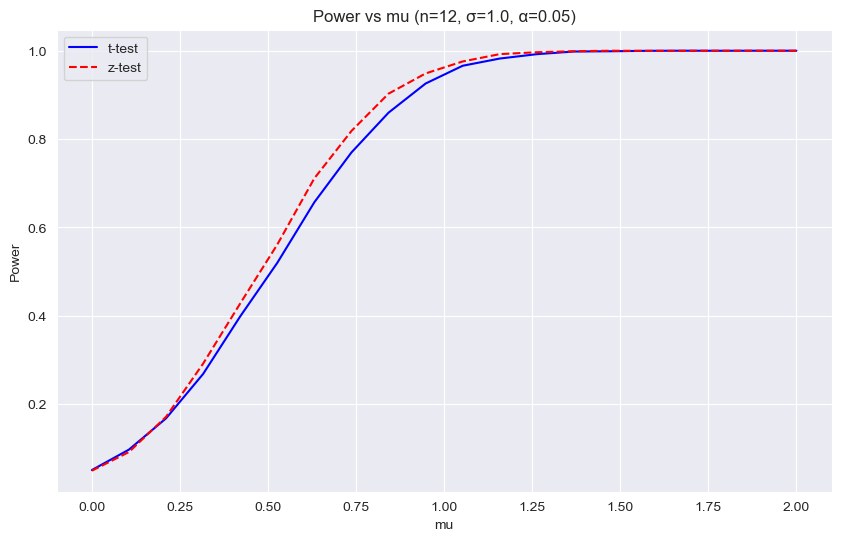

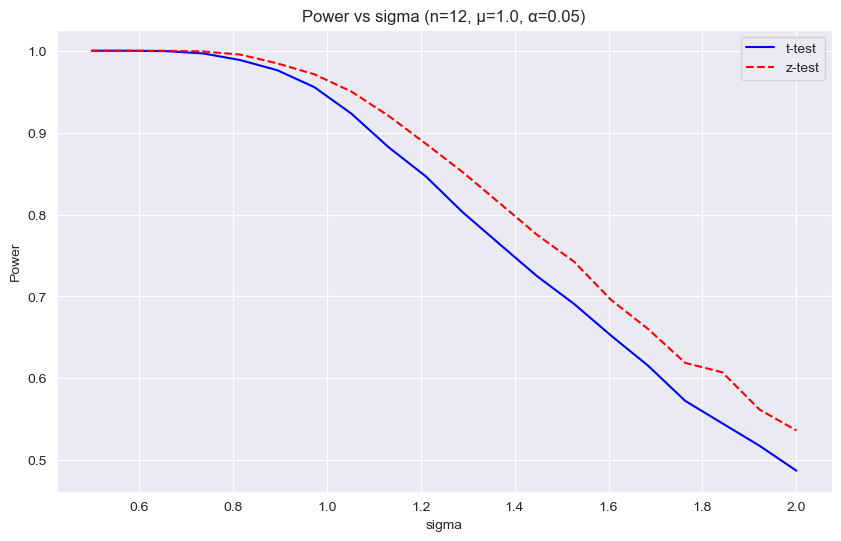

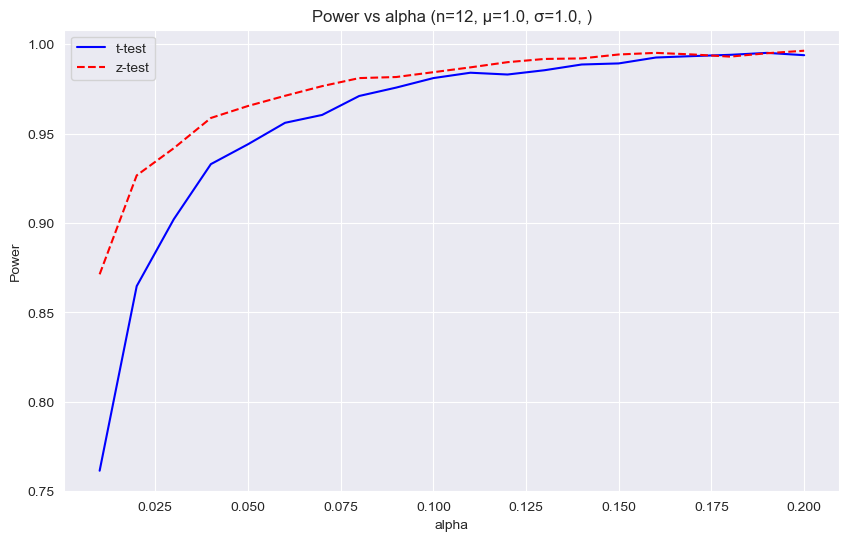

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from typing import Tuple, List

def perform_t_test(n: int, mu: float, alpha: float, sigma: float = 1.0) -> bool:
    """
    Performs a one-sided t-test for a sample drawn from N(mu, sigma^2).

    Args:
        n: Sample size
        mu: Population mean
        alpha: Significance level
        sigma: Population standard deviation (default=1.0)

    Returns:
        bool: True if null hypothesis is rejected, False otherwise
    """
    # Generate random sample
    sample = np.random.normal(loc=mu, scale=sigma, size=n)

    # Calculate sample statistics
    x_bar = np.mean(sample)
    s = np.std(sample, ddof=1)  # ddof=1 for sample standard deviation

    # Calculate test statistic
    t_stat = (x_bar) / (s / np.sqrt(n))

    # Get critical value
    t_crit = stats.t.ppf(1 - alpha, df=n-1)

    # Return whether null is rejected
    return t_stat > t_crit

def calculate_power(n: int, mu: float, alpha: float, N: int, sigma: float = 1.0) -> float:
    """
    Calculates the power of the t-test through simulation.

    Args:
        n: Sample size
        mu: Population mean
        alpha: Significance level
        N: Number of simulation repetitions
        sigma: Population standard deviation (default=1.0)

    Returns:
        float: Proportion of rejections (estimated power)
    """
    rejections = sum(perform_t_test(n, mu, alpha, sigma) for _ in range(N))
    return rejections / N

def perform_z_test(n: int, mu: float, alpha: float, sigma: float = 1.0) -> bool:
    """
    Performs a one-sided z-test for a sample drawn from N(mu, sigma^2).

    Args:
        n: Sample size
        mu: Population mean
        alpha: Significance level
        sigma: Population standard deviation (default=1.0)

    Returns:
        bool: True if null hypothesis is rejected, False otherwise
    """
    sample = np.random.normal(loc=mu, scale=sigma, size=n)
    x_bar = np.mean(sample)
    z_stat = (x_bar) / (sigma / np.sqrt(n))
    z_crit = stats.norm.ppf(1 - alpha)
    return z_stat > z_crit

def calculate_z_power(n: int, mu: float, alpha: float, N: int, sigma: float = 1.0) -> float:
    """
    Calculates the power of the z-test through simulation.

    Args:
        n: Sample size
        mu: Population mean
        alpha: Significance level
        N: Number of simulation repetitions
        sigma: Population standard deviation (default=1.0)

    Returns:
        float: Proportion of rejections (estimated power)
    """
    rejections = sum(perform_z_test(n, mu, alpha, sigma) for _ in range(N))
    return rejections / N

# Function to create power curves
def create_power_curves(parameter_values: np.ndarray,
                       param_name: str,
                       n: int = 12,
                       mu: float = 1.0,
                       alpha: float = 0.05,
                       sigma: float = 1.0,
                       N: int = 10000) -> None:
    """
    Creates power curves for both t-test and z-test while varying one parameter.

    Args:
        parameter_values: Array of values for the parameter being varied
        param_name: Name of the parameter being varied ('mu', 'sigma', or 'alpha')
        n: Sample size (default=12)
        mu: Population mean (default=1.0)
        alpha: Significance level (default=0.05)
        sigma: Population standard deviation (default=1.0)
        N: Number of simulation repetitions (default=10000)
    """
    t_powers = []
    z_powers = []

    for value in parameter_values:
        if param_name == 'mu':
            t_power = calculate_power(n, value, alpha, N, sigma)
            z_power = calculate_z_power(n, value, alpha, N, sigma)
        elif param_name == 'sigma':
            t_power = calculate_power(n, mu, alpha, N, value)
            z_power = calculate_z_power(n, mu, alpha, N, value)
        else:  # alpha
            t_power = calculate_power(n, mu, value, N, sigma)
            z_power = calculate_z_power(n, mu, value, N, sigma)

        t_powers.append(t_power)
        z_powers.append(z_power)

    plt.figure(figsize=(10, 6))
    plt.plot(parameter_values, t_powers, 'b-', label='t-test')
    plt.plot(parameter_values, z_powers, 'r--', label='z-test')
    plt.xlabel(param_name)
    plt.ylabel('Power')
    plt.title(f'Power vs {param_name} (n={n}, ' +
             f'{"" if param_name=="mu" else "μ="+str(mu)+", "}' +
             f'{"" if param_name=="sigma" else "σ="+str(sigma)+", "}' +
             f'{"" if param_name=="alpha" else "α="+str(alpha)})')
    plt.grid(True)
    plt.legend()
    plt.show()

# Calculate power for specific case (question 3)
n, sigma, alpha, mu, N = 12, 1, 0.05, 1, 10000
power = calculate_power(n, mu, alpha, N, sigma)
print(f"Power for n={n}, μ={mu}, σ={sigma}, α={alpha}: {power:.3f}")

# Create power curves for different μ values (question 4)
mu_values = np.linspace(0, 2, 20)
create_power_curves(mu_values, 'mu')

# Create power curves for different σ² values (question 5)
sigma_values = np.linspace(0.5, 2, 20)
create_power_curves(sigma_values, 'sigma')

# Create power curves for different α values (question 6)
alpha_values = np.linspace(0.01, 0.2, 20)
create_power_curves(alpha_values, 'alpha')